<!-- Titre principal centré -->
<center><h2>💥 Road Accident Detection / Détection des accidents de la route avec YOLO 💥</h2></center>

<hr>

<!-- Détails du projet centrés -->
<center>
  <p style="font-size:16px;">
    Réalisé par <strong> Myriam Touil</strong><br>
    Encadré par <strong>Jaber El Aaraj</strong> — Société <strong>Smart Automation Technologies</strong><br>
    <em>Projet PFE 2025 : Analyse des chocs routiers par vision par ordinateur </em>
  </p>
</center>


**1- Installation des bibliothèques**

In [ ]:
# Install YOLOv11 and essential libraries
!pip install ultralytics opencv-python matplotlib tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00


**2- Import required libraries**

In [ ]:
# Import required libraries
import os
import cv2
import shutil
import torch
import torchvision
import numpy as np
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**3- Vérification du GPU**

In [ ]:
if torch.cuda.is_available():
    print("✅ GPU is available !")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("❌ GPU is not available.")

✅ GPU is available !
GPU Name: NVIDIA A100-SXM4-40GB


In [ ]:
import torch, torchvision
print(torch.__version__)       # e.g., 2.0.1+cu126
print(torchvision.__version__) # e.g., 0.15.2
print(torch.cuda.is_available())  # Should be True

2.6.0+cu124
0.21.0+cu124
True


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**4- Téléchargement et préparation du dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WOEIhHEtFCkiw7ijksRS")
project = rf.workspace("nyankosensei").project("highway-cctv-images-for-vehicle-detection-dataset")
version = project.version(6)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6 in yolov11:: 100%|██████████| 20006/20006 [00:03<00:00, 5692.42it/s]


In [ ]:
yaml_path= "/content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/data.yaml"

**5- Chargement du modèle pré-entraîné**

In [ ]:
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 219MB/s]


**6- Entraînement du modèle**

In [ ]:
model = YOLO("yolo11m.pt")
model.train(
    data=yaml_path,                       # Path of dataset YAML file
    epochs=100,                           # epochs
    imgsz=512,                            # image size to capture fine details
    batch=32,                             # batch size
    optimizer="AdamW",                    # AdamW optimizer for stable convergence
    lr0=5e-4,                             # Lower initial learning rate for smoother training
    lrf=0.01,                             # Final learning rate factor
    momentum=0.937,                       # Momentum to smooth gradient updates
    weight_decay=5e-4,                    # Weight decay to reduce overfitting
    patience=10,                          # Early stopping patience to avoid overtraining
    device=device,                        # Use the GPU
    half=True,                            # Mixed precision training for faster computation & lower memory usage
    workers=8,                            # Number of dataloader workers for faster data loading
    project="./nirikshan_Yolo11_model",  # Directory where training results will be saved
    name="nirikshan",                     # Experiment name
    cache=False,                           # Not Cache images in RAM to speed up training
    augment=True,                          # Enable augmentations for better generalization
    hsv_h=0.015,                               # Hue augmentation
    hsv_s=0.8,                            # Saturation augmentation
    hsv_v=0.5,                              # Brightness augmentation
    degrees=5,                          # Small rotation augmentation (degrees)
    translate=0.1,                       # Translation augmentation factor
    scale=0.5,                            # Scaling augmentation factor
    shear=2.0,                           # Shear augmentation in degrees
    perspective=0.0005,                  # Perspective transformation augmentation
    flipud=0.0,                          # Vertical flip probability (set to 0 if not needed)
    fliplr=0.5,                          # Horizontal flip probability
    mosaic=True,                         # Enable mosaic augmentation for richer image combinations
    mixup=0.2,                           # Enable mixup to improve robustness
    label_smoothing=0.1,                 # Apply label smoothing to reduce overconfidence
    plots=True,                          # Generate and save training plots (loss, mAP, etc.)
    save_period=5,                       # Save a checkpoint every 5 epochs
    verbose=True,                        # Enable verbose logging for detailed output
    cos_lr=True,                         # Use cosine learning rate scheduler for smooth decay
    warmup_epochs=5,                     # Gradually warm up the learning rate over 5 epochs
    freeze=0,                            # Train all layers (no freezing)
)


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=True, hsv_h=0.015, hsv_s=0.8, hsv_v=0.5, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=True, multi_scale=False, name=nirikshan, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspectiv

100%|██████████| 755k/755k [00:00<00:00, 113MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 23        [16, 19, 22]  1   1414879  ultralytics.nn.modules.head.Detect           [5, [256, 512, 512]]          
YOLO11m summary: 231 layers, 20,056,863 parameters, 20,056,847 gradients, 68.2 GFLOPs

T

100%|██████████| 5.35M/5.35M [00:00<00:00, 261MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1259.8±479.1 MB/s, size: 48.2 KB)


train: Scanning /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/train/labels... 6841 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6841/6841 [00:04<00:00, 1507.26it/s]


train: New cache created: /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 125, len(boxes) = 33034. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 836.4±583.2 MB/s, size: 47.7 KB)


val: Scanning /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels... 2122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2122/2122 [00:01<00:00, 1212.11it/s]


val: New cache created: /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 10323. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to nirikshan_Yolo11_model/nirikshan/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to nirikshan_Yolo11_model/nirikshan
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.87G      1.347      1.448      1.216        232        512: 100%|██████████| 214/214 [00:43<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]


                   all       2122      10323      0.591      0.564       0.59      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.8G      1.278      1.158      1.175        303        512: 100%|██████████| 214/214 [00:41<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]


                   all       2122      10323      0.485      0.578      0.552      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.8G      1.267      1.098      1.176        263        512: 100%|██████████| 214/214 [00:39<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.55it/s]


                   all       2122      10323      0.733      0.646      0.704      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.9G      1.239      1.054      1.161        265        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]


                   all       2122      10323      0.738      0.716      0.767       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.9G      1.239      1.043      1.167        233        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]


                   all       2122      10323      0.726      0.673      0.724       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        13G      1.225      1.012      1.161        266        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]


                   all       2122      10323      0.741      0.719      0.752      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.1G      1.208     0.9839      1.147        246        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.803      0.722      0.781       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.1G      1.187     0.9384      1.137        239        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]


                   all       2122      10323      0.817      0.739      0.807      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.2G      1.178     0.9198      1.132        275        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]

                   all       2122      10323      0.787      0.727      0.788      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.3G      1.163     0.8997      1.129        294        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.804      0.751      0.812      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.3G      1.137     0.8773      1.115        227        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.839      0.771      0.833      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.4G      1.134     0.8614       1.11        224        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.826      0.779      0.834      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.5G      1.118     0.8433      1.108        211        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.833       0.78      0.847        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.5G      1.103     0.8275      1.096        306        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.843       0.79      0.855      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.6G      1.097     0.8076      1.091        176        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.834      0.781      0.842      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.7G        1.1     0.8143      1.093        216        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]


                   all       2122      10323      0.812      0.804      0.844        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.7G      1.086     0.7921      1.086        256        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.837      0.799      0.854       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.8G       1.08     0.7878      1.083        232        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]

                   all       2122      10323      0.839      0.798       0.86      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.9G      1.077     0.7846      1.085        250        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.855      0.792      0.868      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.9G      1.064     0.7712       1.08        295        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.862      0.799      0.862      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        14G      1.061     0.7544       1.08        203        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.836      0.804      0.853      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.1G      1.056     0.7468      1.074        237        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]


                   all       2122      10323      0.848      0.803       0.86      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.1G      1.041     0.7373      1.064        232        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323       0.85      0.823      0.863       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.2G      1.029     0.7309      1.062        291        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.862      0.819      0.872       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.3G      1.039     0.7288      1.066        260        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.876      0.822      0.877       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.3G      1.026     0.7147      1.059        223        512: 100%|██████████| 214/214 [00:37<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.882      0.807      0.877      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.4G      1.025     0.7171      1.059        313        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.854      0.826       0.87      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.5G      1.017     0.7018      1.055        270        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.856      0.838      0.886      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.5G      1.016     0.6984      1.059        318        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323       0.87      0.828      0.876       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.6G      1.009     0.6934      1.053        192        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.875      0.832       0.88      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.7G      1.003     0.6869      1.052        298        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.886      0.817      0.882      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.7G      1.002     0.6807      1.049        203        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.861      0.837      0.875      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.8G      1.003     0.6829      1.048        212        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.864      0.833       0.88      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.9G     0.9895     0.6725      1.045        284        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323       0.86       0.84      0.878      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.9G     0.9874     0.6625      1.041        247        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.872      0.845       0.89      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        15G     0.9778     0.6505      1.038        277        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.874      0.834      0.884      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.1G     0.9821     0.6599      1.041        241        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]

                   all       2122      10323      0.883       0.84      0.887      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      15.1G     0.9645     0.6447      1.035        301        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.877      0.841      0.893      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      15.2G     0.9782      0.645      1.039        168        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.885       0.84      0.892      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      15.3G     0.9623     0.6399       1.03        214        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.876      0.844      0.886      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.3G      0.957     0.6286       1.03        336        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.878      0.853      0.888      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.4G     0.9608     0.6308      1.032        287        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]

                   all       2122      10323      0.878      0.856      0.895        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.5G      0.953     0.6248      1.027        236        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.896      0.837      0.891      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.5G     0.9512     0.6204      1.023        245        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.878      0.854      0.893      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      15.6G     0.9503     0.6162      1.025        256        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.888      0.846      0.896      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      15.7G     0.9432     0.6102      1.021        242        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323       0.88       0.86      0.898      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      15.7G     0.9474     0.6134      1.019        195        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.871      0.859      0.889      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      15.8G     0.9383      0.605       1.02        286        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.879      0.854      0.888      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      15.9G      0.936     0.5986      1.019        274        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.70it/s]

                   all       2122      10323      0.892      0.848      0.893      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.9G     0.9156     0.5837      1.012        280        512: 100%|██████████| 214/214 [00:37<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]

                   all       2122      10323      0.877      0.861      0.891      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        16G     0.9203      0.587      1.012        236        512: 100%|██████████| 214/214 [00:38<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]

                   all       2122      10323      0.889      0.861        0.9      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      16.1G     0.9221     0.5868       1.01        240        512: 100%|██████████| 214/214 [00:37<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.884      0.858      0.898      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      16.1G     0.9065     0.5786      1.007        230        512: 100%|██████████| 214/214 [00:38<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.887       0.86      0.901       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      16.2G     0.9136     0.5761       1.01        199        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.896      0.853      0.898      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      16.3G     0.9024     0.5714      1.007        234        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.886      0.855      0.894      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      16.3G     0.9018     0.5693      1.007        287        512: 100%|██████████| 214/214 [00:38<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323      0.895      0.858      0.897      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      16.4G      0.897     0.5613      1.005        219        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.903      0.856      0.895      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      16.5G     0.8918     0.5509     0.9972        199        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.896       0.86      0.897      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      16.5G     0.9046     0.5612      1.004        218        512: 100%|██████████| 214/214 [00:38<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.883      0.868      0.895      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      16.6G     0.8892      0.552     0.9968        213        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.899      0.852      0.896      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      16.7G     0.8935     0.5539      1.002        244        512: 100%|██████████| 214/214 [00:38<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323       0.89      0.861      0.897      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      16.7G     0.8863     0.5485     0.9979        199        512: 100%|██████████| 214/214 [00:38<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.888      0.864      0.896      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      16.8G     0.8792     0.5396     0.9923        242        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.889      0.864      0.896      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.9G     0.8817     0.5439     0.9973        312        512: 100%|██████████| 214/214 [00:38<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.893      0.863        0.9       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.9G     0.8706     0.5334     0.9901        206        512: 100%|██████████| 214/214 [00:38<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.893      0.861      0.899      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      17.2G     0.8736     0.5336     0.9935        234        512: 100%|██████████| 214/214 [00:38<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.899      0.861      0.899      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      17.2G     0.8708     0.5286     0.9926        251        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.894      0.862      0.898      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      17.3G     0.8638     0.5236     0.9868        327        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.895      0.863      0.898      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      17.5G      0.862     0.5224     0.9876        289        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.897       0.86      0.902      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      17.6G     0.8615     0.5251     0.9881        217        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.896       0.86      0.901      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      17.7G      0.859     0.5189     0.9862        187        512: 100%|██████████| 214/214 [00:38<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.898      0.862      0.902      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      17.7G     0.8612     0.5193     0.9863        281        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.894      0.865      0.895      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      17.9G     0.8479     0.5116     0.9819        222        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       2122      10323      0.899      0.861      0.898      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        18G     0.8408     0.5067     0.9801        219        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.901      0.861      0.901      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      18.1G     0.8412     0.5032     0.9771        351        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.897      0.863      0.901      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      18.3G     0.8476     0.5032     0.9805        311        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.891      0.871        0.9      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      18.3G     0.8447     0.5021     0.9806        257        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.897      0.862      0.901      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      18.6G     0.8404     0.5024     0.9812        218        512: 100%|██████████| 214/214 [00:38<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.904      0.855        0.9      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      18.6G     0.8321     0.4947     0.9743        209        512: 100%|██████████| 214/214 [00:38<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.893      0.866      0.901      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      18.7G      0.834     0.4941     0.9753        220        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]

                   all       2122      10323      0.901      0.861      0.903       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      18.8G     0.8385     0.4931     0.9783        240        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       2122      10323      0.899      0.861      0.901      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        19G     0.8378     0.4955     0.9781        244        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       2122      10323      0.898      0.863      0.899      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      19.1G     0.8265     0.4818     0.9739        198        512: 100%|██████████| 214/214 [00:38<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       2122      10323      0.895      0.867      0.899      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      19.3G     0.8258     0.4809     0.9724        280        512: 100%|██████████| 214/214 [00:38<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]

                   all       2122      10323      0.897      0.864        0.9      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      19.4G     0.8248     0.4853     0.9731        180        512: 100%|██████████| 214/214 [00:38<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.885      0.875      0.902       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      19.4G     0.8257     0.4861     0.9709        163        512: 100%|██████████| 214/214 [00:38<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]

                   all       2122      10323      0.885      0.877      0.901       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      19.5G      0.826     0.4856     0.9724        229        512: 100%|██████████| 214/214 [00:38<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]

                   all       2122      10323       0.89      0.874      0.901       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      19.8G      0.826     0.4828     0.9707        214        512: 100%|██████████| 214/214 [00:38<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.63it/s]

                   all       2122      10323      0.892       0.87      0.901       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G     0.8256      0.484     0.9723        268        512: 100%|██████████| 214/214 [00:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.70it/s]

                   all       2122      10323      0.892      0.871        0.9      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.1G     0.8228     0.4811      0.973        267        512: 100%|██████████| 214/214 [00:38<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]

                   all       2122      10323      0.896      0.868        0.9       0.73


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.1G     0.7278     0.3592     0.9229        101        512: 100%|██████████| 214/214 [00:39<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]

                   all       2122      10323      0.895      0.869      0.898      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.1G     0.7178     0.3477     0.9197        120        512: 100%|██████████| 214/214 [00:37<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.70it/s]

                   all       2122      10323      0.896      0.868      0.898      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.1G     0.7123     0.3439      0.919        105        512: 100%|██████████| 214/214 [00:37<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       2122      10323      0.892       0.87      0.899      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.1G     0.7112     0.3428     0.9174        119        512: 100%|██████████| 214/214 [00:37<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]

                   all       2122      10323      0.895      0.867      0.898      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.1G     0.7065     0.3406     0.9159        102        512: 100%|██████████| 214/214 [00:37<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]

                   all       2122      10323      0.894      0.867      0.899      0.727
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 85, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



95 epochs completed in 1.282 hours.
Optimizer stripped from nirikshan_Yolo11_model/nirikshan/weights/last.pt, 40.5MB
Optimizer stripped from nirikshan_Yolo11_model/nirikshan/weights/best.pt, 40.5MB

Validating nirikshan_Yolo11_model/nirikshan/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]


                   all       2122      10323      0.897      0.867      0.901      0.726
              accident        692        707      0.945      0.966      0.981      0.904
                   bus        272        356      0.755      0.784      0.752      0.565
                   car        983       3895      0.949      0.911      0.959      0.804
            motorcycle        279        830      0.943      0.851      0.918      0.733
                 truck        902       4535      0.893      0.824      0.893      0.623
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to nirikshan_Yolo11_model/nirikshan


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea1be3dca90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

**7- Téléchargement du modèle entraîné **

In [ ]:
from google.colab import files
files.download('/content/nirikshan_Yolo11_model/nirikshan/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**8- Évaluation du modèle sur les données de validation**

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 955.0±434.9 MB/s, size: 42.1 KB)


val: Scanning /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels.cache... 2122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2122/2122 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 10323. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:16<00:00,  4.03it/s]


                   all       2122      10323      0.897      0.867      0.899      0.725
              accident        692        707      0.945      0.966       0.98      0.904
                   bus        272        356      0.753      0.784      0.752      0.564
                   car        983       3895       0.95       0.91      0.958      0.804
            motorcycle        279        830      0.944      0.849      0.913      0.731
                 truck        902       4535      0.893      0.824      0.893      0.623
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to nirikshan_Yolo11_model/nirikshan2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea180c25d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)

In [ ]:
model.val(save_json=True, plots=True)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 881.0±311.9 MB/s, size: 44.4 KB)


val: Scanning /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels.cache... 2122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2122/2122 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 10323. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:17<00:00,  3.93it/s]


                   all       2122      10323      0.897      0.867      0.899      0.725
              accident        692        707      0.945      0.966       0.98      0.904
                   bus        272        356      0.753      0.784      0.752      0.564
                   car        983       3895       0.95       0.91      0.958      0.804
            motorcycle        279        830      0.944      0.849      0.913      0.731
                 truck        902       4535      0.893      0.824      0.893      0.623
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving nirikshan_Yolo11_model/nirikshan3/predictions.json...
Results saved to nirikshan_Yolo11_model/nirikshan3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9c9900c290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

**9-Affichage de la matrice de confusion**

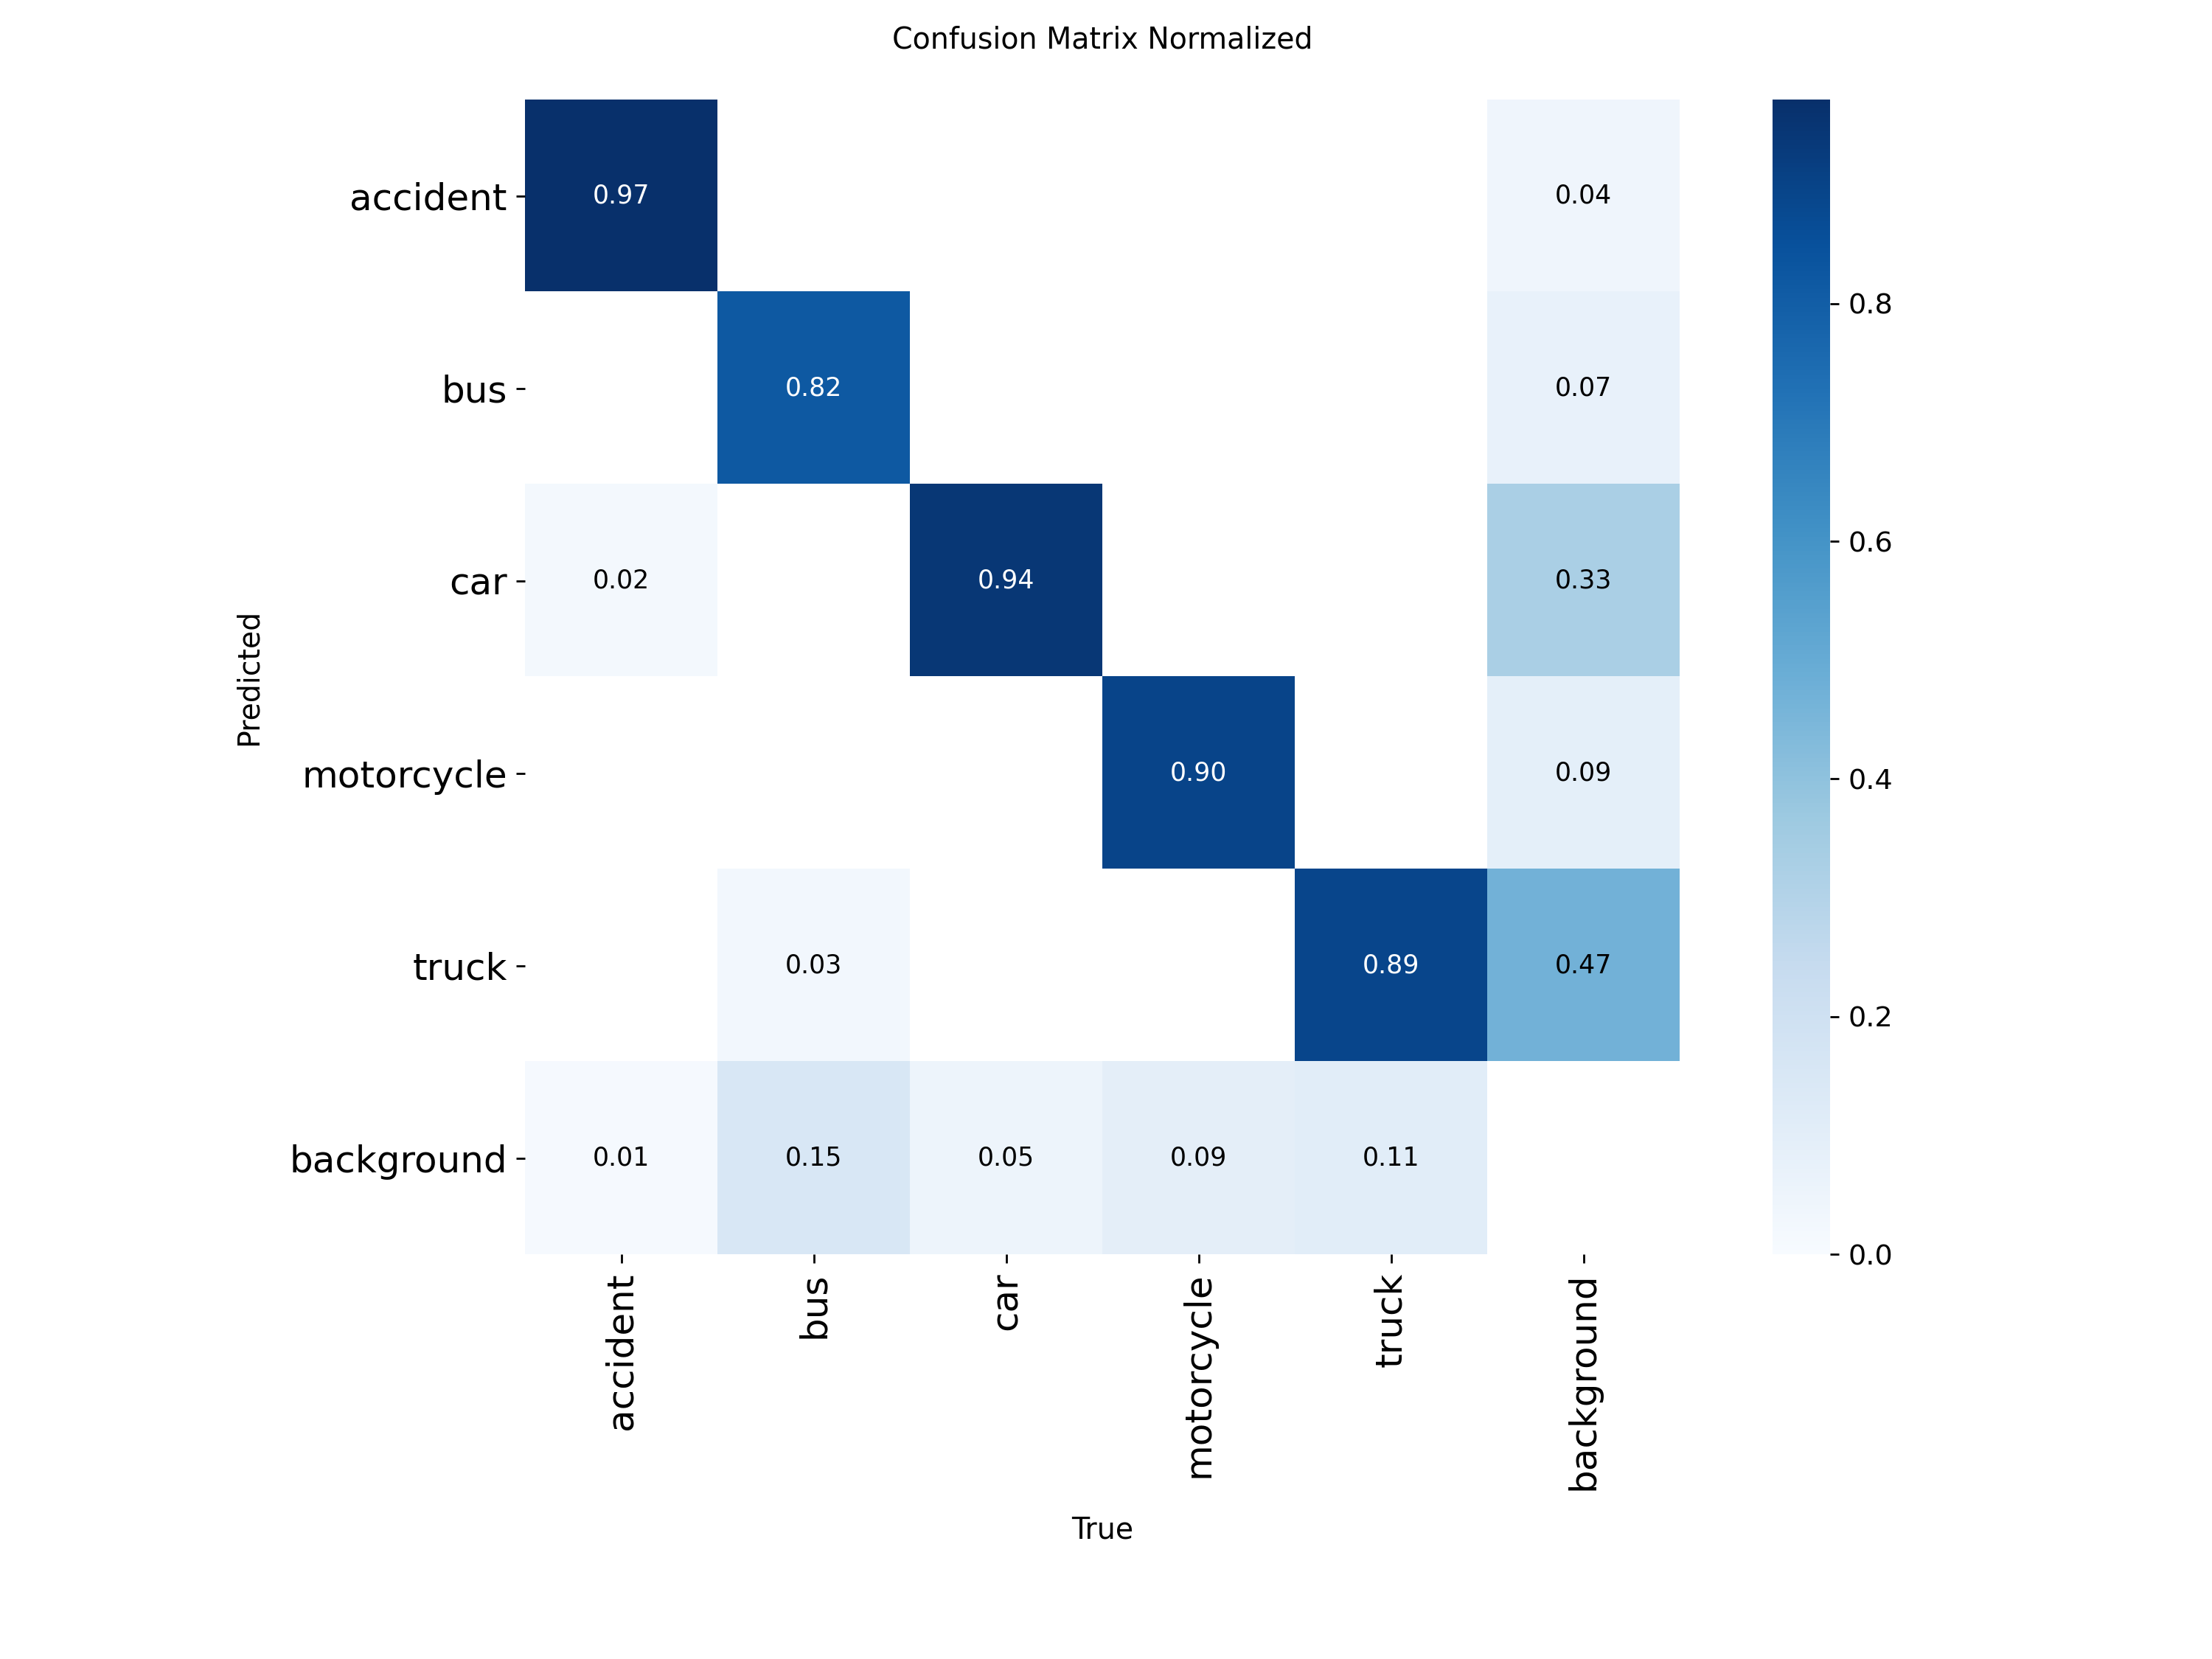

In [ ]:
from IPython.display import Image

Image(filename="/content/nirikshan_Yolo11_model/nirikshan/confusion_matrix_normalized.png", width=600)

**Chargement et affichage des résultats d’évaluation depuis le fichier CSV**

In [ ]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('/content/nirikshan_Yolo11_model/nirikshan/results.csv')

# Afficher les premières lignes du fichier
df.head(-1)


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,54.0799,1.34743,1.44832,1.21622,0.59146,0.56422,0.59021,0.36590,1.32811,1.22868,1.14560,0.080193,0.000100,0.000100
1,2,106.9660,1.27791,1.15794,1.17508,0.48531,0.57816,0.55235,0.35102,1.26940,1.64869,1.15810,0.060293,0.000199,0.000199
2,3,157.4850,1.26655,1.09768,1.17583,0.73296,0.64601,0.70400,0.43731,1.32452,1.10770,1.16419,0.040393,0.000299,0.000299
3,4,205.9980,1.23933,1.05432,1.16127,0.73849,0.71607,0.76711,0.50965,1.14204,0.89535,1.09570,0.020492,0.000399,0.000399
4,5,254.9440,1.23949,1.04349,1.16735,0.72642,0.67264,0.72406,0.46972,1.20376,0.99123,1.12535,0.000591,0.000498,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,4374.0000,0.82283,0.48114,0.97300,0.89629,0.86765,0.89971,0.72974,0.83848,0.46561,0.96160,0.000020,0.000020,0.000020
90,91,4423.5900,0.72779,0.35924,0.92294,0.89497,0.86897,0.89821,0.72633,0.84250,0.46714,0.96542,0.000017,0.000017,0.000017
91,92,4471.5200,0.71783,0.34773,0.91970,0.89563,0.86759,0.89816,0.72540,0.84313,0.46858,0.96617,0.000015,0.000015,0.000015
92,93,4519.2400,0.71232,0.34390,0.91897,0.89245,0.86999,0.89859,0.72626,0.84267,0.46844,0.96632,0.000013,0.000013,0.000013


**Affichage des prédictions du modèle sur un batch d’images de validation**

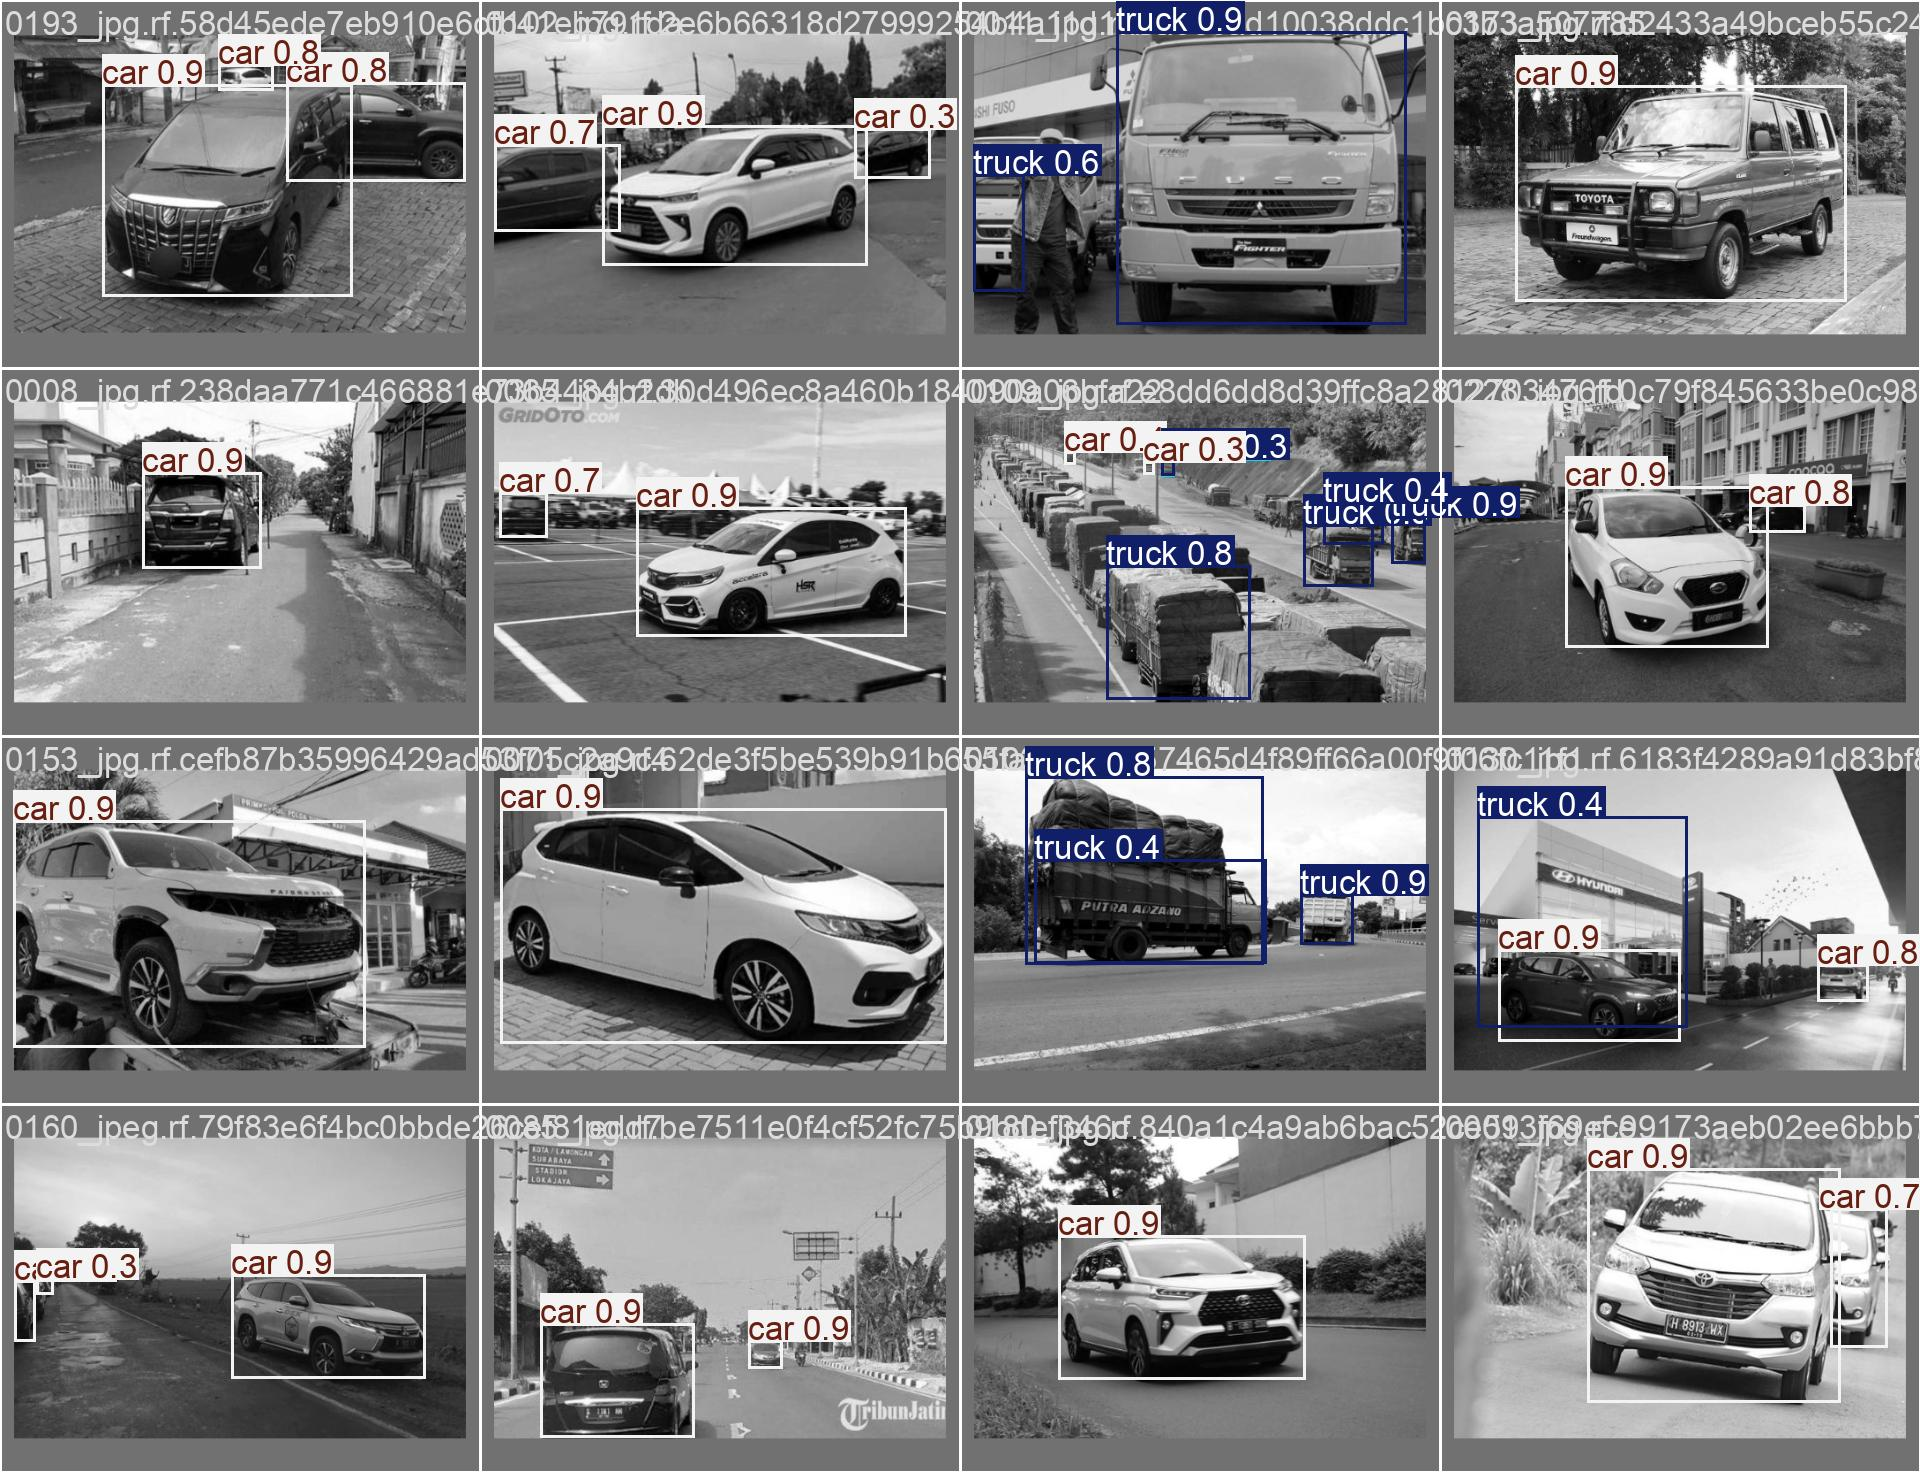

In [ ]:
from IPython.display import Image

Image(filename=f'/content/nirikshan_Yolo11_model/nirikshan3/val_batch2_pred.jpg', width=600)

In [ ]:
from ultralytics import YOLO

# 1. Charger le modèle entraîné
model = YOLO("/content/Accident_model.pt")
# 2. Évaluer le modèle sur un jeu de données
results = model.val(data="/content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/data.yaml")  # chemin vers le fichier YAML du dataset


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1293.5±311.9 MB/s, size: 42.2 KB)



val: Scanning /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels... 2122 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2122/2122 [00:00<00:00, 2202.51it/s]

val: New cache created: /content/Highway-CCTV-Images-for-Vehicle-Detection-Dataset-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 10323. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:40<00:00,  3.29it/s]


                   all       2122      10323      0.883      0.877      0.902       0.73
              accident        692        707      0.935      0.958      0.978      0.902
                   bus        272        356      0.748      0.798      0.761       0.57
                   car        983       3895      0.935      0.921      0.959       0.81
            motorcycle        279        830      0.926       0.86      0.916      0.737
                 truck        902       4535      0.869      0.846      0.895      0.631
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import torch
torch.cuda.empty_cache()
print("Done")

**Prédiction sur une vidéo**

In [ ]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source=/content/acci.mp4

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs

video 1/1 (frame 1/1022) /content/acci.mp4: 288x512 (no detections), 605.7ms
video 1/1 (frame 2/1022) /content/acci.mp4: 288x512 (no detections), 625.7ms
video 1/1 (frame 3/1022) /content/acci.mp4: 288x512 (no detections), 579.1ms
video 1/1 (frame 4/1022) /content/acci.mp4: 288x512 (no detections), 564.6ms
video 1/1 (frame 5/1022) /content/acci.mp4: 288x512 (no detections), 569.7ms
video 1/1 (frame 6/1022) /content/acci.mp4: 288x512 (no detections), 877.4ms
video 1/1 (frame 7/1022) /content/acci.mp4: 288x512 (no detections), 895.4ms
video 1/1 (frame 8/1022) /content/acci.mp4: 288x512 (no detections), 880.5ms
video 1/1 (frame 9/1022) /content/acci.mp4: 288x512 (no detections), 699.4ms
video 1/1 (frame 10/1022) /content/acci.mp4: 288x512 (no detections), 580.8ms
video 1/1 (frame 11/1022) /content/acci.mp4: 288x512 (no detect